In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#We read the files

# covidmap=gpd.read_file("../data/comarques_1M/divisions-administratives-v2r1-comarques-1000000-20250730.shp")
#covidmap=gpd.read_file("../data/comarques_5K/divisions-administratives-v2r1-comarques-5000-20250730.shp")
#covid=pd.read_csv("../data/covid.csv")

covidmap=gpd.read_file(r'/Users/sergig.r/Desktop/comarques/comarques_1M/divisions-administratives-v2r1-comarques-1000000-20250730.shp')
covid=pd.read_csv(r'/Users/sergig.r/Desktop/covid.csv')

#covidmap=gpd.read_file(r'/Users/sergig.r/Desktop/municipis/municipis_1M/divisions-administratives-v2r1-municipis-1000000-20250730.shp')
#covid=pd.read_csv(r'/Users/sergig.r/Desktop/covid.csv')

In [2]:
covid.head()

,TipusCasData,ComarcaCodi,ComarcaDescripcio,MunicipiCodi,MunicipiDescripcio,DistricteCodi,DistricteDescripcio,SexeCodi,SexeDescripcio,TipusCasDescripcio,NumCasos
0,08/10/2020,21.0,MARESME,8121.0,MATARÓ,NaN,No classificat,1.0,Dona,Positiu per Test Ràpid,1
1,05/07/2022,23.0,NOGUERA,25240.0,VALLFOGONA DE BALAGUER,NaN,No classificat,1.0,Dona,Positiu TAR,2
2,12/06/2020,7.0,BAGES,8191.0,SALLENT,NaN,No classificat,1.0,Dona,Positiu per Test Ràpid,1
3,13/01/2022,24.0,OSONA,8037.0,CALLDETENES,NaN,No classificat,1.0,Dona,Positiu PCR,1
4,11/06/2022,40.0,VALLÈS OCCIDENTAL,8279.0,TERRASSA,NaN,No classificat,0.0,Home,Positiu TAR,10


In [3]:
covidmap.head()

,CODICOMAR,NOMCOMAR,CAPCOMAR,AREAC5000,geometry
0,01,Alt Camp,Valls,537.8597,"POLYGON ((373020.449 4590188.741, 372482.744 4..."
1,02,Alt Empordà,Figueres,1356.9070,"MULTIPOLYGON (((513760.14 4662388.22, 513758.6..."
2,03,Alt Penedès,Vilafranca del Penedès,592.5553,"POLYGON ((386593.3 4595896.2, 388616.1 4595870..."
3,04,Alt Urgell,la Seu d'Urgell,1446.6785,"MULTIPOLYGON (((360800.1 4649174, 360624.5 464..."
4,05,Alta Ribagorça,el Pont de Suert,427.2234,"POLYGON ((327485.124 4721105.796, 327436.728 4..."


In [4]:
#covidmap["NOMMUNI"]=covidmap["NOMMUNI"].str.upper() #We rewrite the cities names in capital letters.
#covidmap.head()
covidmap["NOMCOMAR"]=covidmap["NOMCOMAR"].str.upper()

In [5]:
# Simplify geometry (reduce points)
# covidmap["geometry"] = covidmap["geometry"].simplify(tolerance=500, preserve_topology=True)




covid=covid.rename(columns={"ComarcaDescripcio": "NOMCOMAR"})
#covid=covid.rename(columns={"MunicipiDescripcio": "NOMMUNI"})#Change city columns name to be the same as covidmap


print(covid.columns)
print(covidmap.columns)


covid_comarca = covid[["NOMCOMAR", "NumCasos"]].groupby("NOMCOMAR")["NumCasos"].sum().reset_index()
#covid_municipi = covid[["NOMMUNI", "NumCasos"]].groupby("NOMMUNI")["NumCasos"].sum().reset_index()
covid.head()



Index(['TipusCasData', 'ComarcaCodi', 'NOMCOMAR', 'MunicipiCodi',
       'MunicipiDescripcio', 'DistricteCodi', 'DistricteDescripcio',
       'SexeCodi', 'SexeDescripcio', 'TipusCasDescripcio', 'NumCasos'],
      dtype='object')
Index(['CODICOMAR', 'NOMCOMAR', 'CAPCOMAR', 'AREAC5000', 'geometry'], dtype='object')


,TipusCasData,ComarcaCodi,NOMCOMAR,MunicipiCodi,MunicipiDescripcio,DistricteCodi,DistricteDescripcio,SexeCodi,SexeDescripcio,TipusCasDescripcio,NumCasos
0,08/10/2020,21.0,MARESME,8121.0,MATARÓ,NaN,No classificat,1.0,Dona,Positiu per Test Ràpid,1
1,05/07/2022,23.0,NOGUERA,25240.0,VALLFOGONA DE BALAGUER,NaN,No classificat,1.0,Dona,Positiu TAR,2
2,12/06/2020,7.0,BAGES,8191.0,SALLENT,NaN,No classificat,1.0,Dona,Positiu per Test Ràpid,1
3,13/01/2022,24.0,OSONA,8037.0,CALLDETENES,NaN,No classificat,1.0,Dona,Positiu PCR,1
4,11/06/2022,40.0,VALLÈS OCCIDENTAL,8279.0,TERRASSA,NaN,No classificat,0.0,Home,Positiu TAR,10


In [6]:
from matplotlib.colors import LogNorm

covid_comarca=covid_comarca.dropna()
#covid_municipi=covid_municipi.dropna()

#covid_comarca['CODICOMAR']=covid_comarca['CODICOMAR'].astype(float).astype(int).astype(str)
#covid_comarca['CODICOMAR']=covid_comarca['CODICOMAR'].str.zfill(2)
#covidmap['CODICOMAR']=covidmap['CODICOMAR'].astype(str).str.zfill(2)

#covidmap_covid=covidmap.merge(covid_municipi, on="NOMMUNI", how="left")
covidmap_covid=covidmap.merge(covid_comarca, on="NOMCOMAR", how="left")




#covidmap_covid.head()


In [7]:
covid.head()


,TipusCasData,ComarcaCodi,NOMCOMAR,MunicipiCodi,MunicipiDescripcio,DistricteCodi,DistricteDescripcio,SexeCodi,SexeDescripcio,TipusCasDescripcio,NumCasos
0,08/10/2020,21.0,MARESME,8121.0,MATARÓ,NaN,No classificat,1.0,Dona,Positiu per Test Ràpid,1
1,05/07/2022,23.0,NOGUERA,25240.0,VALLFOGONA DE BALAGUER,NaN,No classificat,1.0,Dona,Positiu TAR,2
2,12/06/2020,7.0,BAGES,8191.0,SALLENT,NaN,No classificat,1.0,Dona,Positiu per Test Ràpid,1
3,13/01/2022,24.0,OSONA,8037.0,CALLDETENES,NaN,No classificat,1.0,Dona,Positiu PCR,1
4,11/06/2022,40.0,VALLÈS OCCIDENTAL,8279.0,TERRASSA,NaN,No classificat,0.0,Home,Positiu TAR,10


In [8]:
covidmap.head()

,CODICOMAR,NOMCOMAR,CAPCOMAR,AREAC5000,geometry
0,01,ALT CAMP,Valls,537.8597,"POLYGON ((373020.449 4590188.741, 372482.744 4..."
1,02,ALT EMPORDÀ,Figueres,1356.9070,"MULTIPOLYGON (((513760.14 4662388.22, 513758.6..."
2,03,ALT PENEDÈS,Vilafranca del Penedès,592.5553,"POLYGON ((386593.3 4595896.2, 388616.1 4595870..."
3,04,ALT URGELL,la Seu d'Urgell,1446.6785,"MULTIPOLYGON (((360800.1 4649174, 360624.5 464..."
4,05,ALTA RIBAGORÇA,el Pont de Suert,427.2234,"POLYGON ((327485.124 4721105.796, 327436.728 4..."


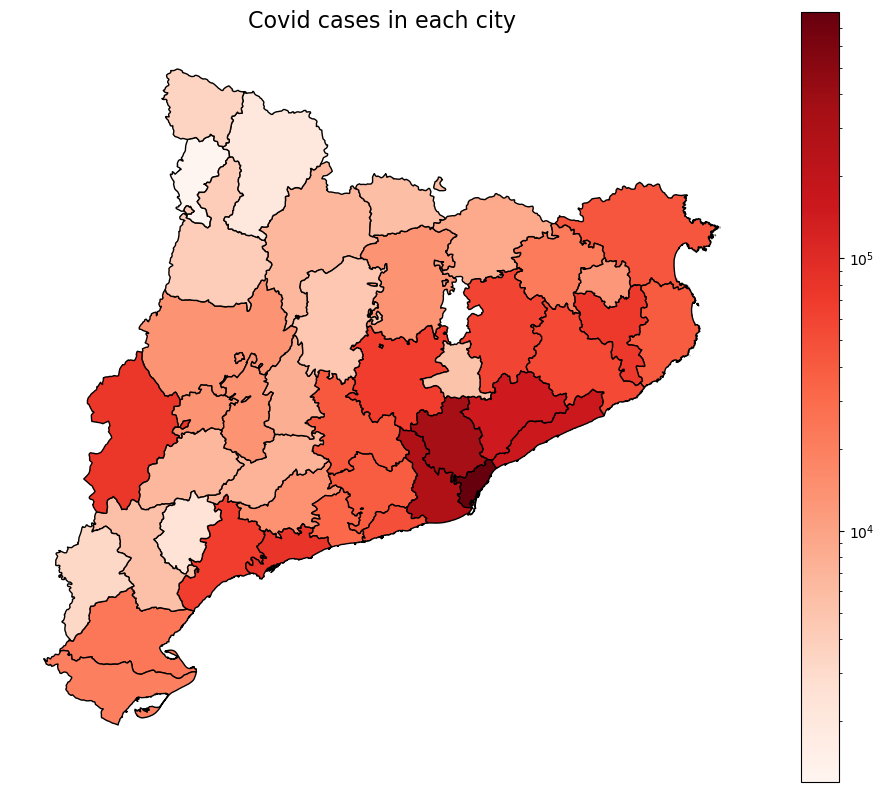

In [9]:
ax=covidmap_covid.plot(
 column="NumCasos",
 cmap="Reds",
 legend=True,
 edgecolor="black",
 figsize=(12,10),
 norm= LogNorm(vmin=covidmap_covid["NumCasos"].min(),
                 vmax=covidmap_covid["NumCasos"].max())
)

ax.set_title("Covid cases in each city", fontsize=16)
ax.set_axis_off()
plt.show()

In [10]:
poblacio0=pd.read_csv(r'/Users/sergig.r/Desktop/poblacio/poblacioo.csv')

poblacio0["row"]=poblacio0["row"].str.upper()
poblacio = poblacio0[poblacio0["col"] == "Població"][["row", "value"]]#generate a column only with the population


In [11]:

poblacio=poblacio.rename(columns={"row": "NOMCOMAR"})
densitat=covidmap_covid.merge(poblacio, on="NOMCOMAR", how="left")

densitat["density"] = densitat["NumCasos"] / densitat["value"]#value is the column for the population of each comarca
densitat.head()


,CODICOMAR,NOMCOMAR,CAPCOMAR,AREAC5000,geometry,NumCasos,value,density
0,01,ALT CAMP,Valls,537.8597,"POLYGON ((373020.449 4590188.741, 372482.744 4...",13778.0,44695.0,0.308267
1,02,ALT EMPORDÀ,Figueres,1356.9070,"MULTIPOLYGON (((513760.14 4662388.22, 513758.6...",43064.0,142624.0,0.301941
2,03,ALT PENEDÈS,Vilafranca del Penedès,592.5553,"POLYGON ((386593.3 4595896.2, 388616.1 4595870...",38196.0,109606.0,0.348485
3,04,ALT URGELL,la Seu d'Urgell,1446.6785,"MULTIPOLYGON (((360800.1 4649174, 360624.5 464...",6631.0,20231.0,0.327764
4,05,ALTA RIBAGORÇA,el Pont de Suert,427.2234,"POLYGON ((327485.124 4721105.796, 327436.728 4...",1197.0,3825.0,0.312941


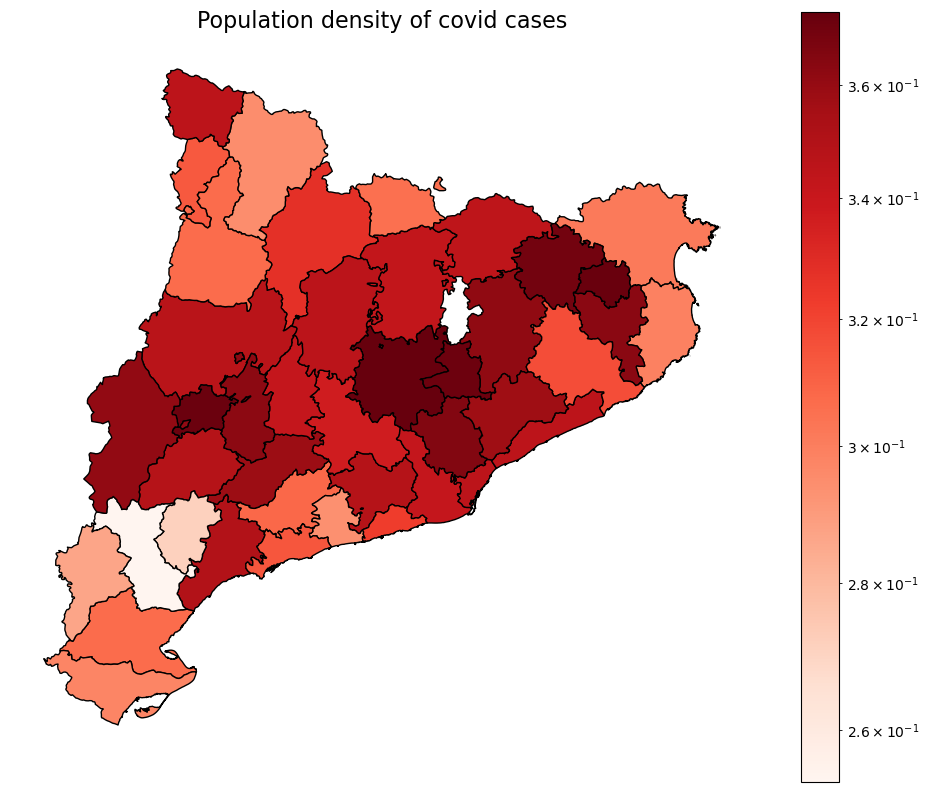

In [12]:
ax=densitat.plot(
 column="density",
 cmap="Reds",
 legend=True,
 edgecolor="black",
 figsize=(12,10),
 norm= LogNorm(vmin=densitat["density"].min(),
                 vmax=densitat["density"].max())
)

ax.set_title("Population density of covid cases", fontsize=16)
ax.set_axis_off()
plt.show()

In [13]:
###############################################animation

In [14]:

covid.head()

,TipusCasData,ComarcaCodi,NOMCOMAR,MunicipiCodi,MunicipiDescripcio,DistricteCodi,DistricteDescripcio,SexeCodi,SexeDescripcio,TipusCasDescripcio,NumCasos
0,08/10/2020,21.0,MARESME,8121.0,MATARÓ,NaN,No classificat,1.0,Dona,Positiu per Test Ràpid,1
1,05/07/2022,23.0,NOGUERA,25240.0,VALLFOGONA DE BALAGUER,NaN,No classificat,1.0,Dona,Positiu TAR,2
2,12/06/2020,7.0,BAGES,8191.0,SALLENT,NaN,No classificat,1.0,Dona,Positiu per Test Ràpid,1
3,13/01/2022,24.0,OSONA,8037.0,CALLDETENES,NaN,No classificat,1.0,Dona,Positiu PCR,1
4,11/06/2022,40.0,VALLÈS OCCIDENTAL,8279.0,TERRASSA,NaN,No classificat,0.0,Home,Positiu TAR,10


In [15]:

#Now we do the same as before but for each year

# Covert 'TipusCasData' to a datetime
covid['TipusCasData'] = pd.to_datetime(covid['TipusCasData'], format='%d/%m/%Y')

covid['year'] = covid['TipusCasData'].dt.year


# Agrupar por 'Año' y 'NOMCOMAR' (comarca)
covid_year = covid.groupby(['year', 'NOMCOMAR'])['NumCasos'].sum().reset_index()
covid_year.head(44)

,year,NOMCOMAR,NumCasos
0,2020,A,1
1,2020,ALT CAMP,1476
2,2020,ALT EMPORDÀ,7200
3,2020,ALT PENEDÈS,4813
4,2020,ALT URGELL,980
5,2020,ALTA RIBAGORÇA,111
6,2020,ANOIA,6268
7,2020,BAGES,10105
8,2020,BAIX CAMP,9908
9,2020,BAIX EBRE,3109


In [16]:


covid_year=covid_year.dropna()
covidmap_covid_year=covidmap.merge(covid_year, on="NOMCOMAR", how="left")

# Verifica el resultado
poblacio20=pd.read_csv(r'/Users/sergig.r/Desktop/poblacio/poblacio20.csv')
poblacio21=pd.read_csv(r'/Users/sergig.r/Desktop/poblacio/poblacio21.csv')
poblacio22=pd.read_csv(r'/Users/sergig.r/Desktop/poblacio/poblacio22.csv')


poblacio20["row"]=poblacio20["row"].str.upper()
poblacio20=poblacio20[poblacio20["col"] == "Població"][["row", "value"]]#generate a column only with the population
poblacio20=poblacio20.rename(columns={"row": "NOMCOMAR"})
densitat20=covidmap_covid_year.merge(poblacio20, on="NOMCOMAR", how="left")
densitat20["density"] = densitat20["NumCasos"] / densitat20["value"]

poblacio21["row"]=poblacio21["row"].str.upper()
poblacio21= poblacio21[poblacio21["col"] == "Població"][["row", "value"]]#generate a column only with the population
poblacio21=poblacio21.rename(columns={"row": "NOMCOMAR"})
densitat21=covidmap_covid_year.merge(poblacio21, on="NOMCOMAR", how="left")
densitat21["density"] = densitat21["NumCasos"] / densitat21["value"]

poblacio22["row"]=poblacio22["row"].str.upper()
poblacio22= poblacio22[poblacio0["col"] == "Població"][["row", "value"]]#generate a column only with the population
poblacio22=poblacio22.rename(columns={"row": "NOMCOMAR"})
densitat22=covidmap_covid_year.merge(poblacio22, on="NOMCOMAR", how="left")
densitat22["density"] = densitat22["NumCasos"] / densitat20["value"]



densitat20 = densitat20[densitat20['year'] == 2020]
densitat21 = densitat21[densitat21['year'] == 2021]
densitat22 = densitat22[densitat22['year'] == 2022]




In [17]:
densitat20.head()

,CODICOMAR,NOMCOMAR,CAPCOMAR,AREAC5000,geometry,year,NumCasos,value,density
0,01,ALT CAMP,Valls,537.8597,"POLYGON ((373020.449 4590188.741, 372482.744 4...",2020.0,1476.0,44695.0,0.033024
3,02,ALT EMPORDÀ,Figueres,1356.9070,"MULTIPOLYGON (((513760.14 4662388.22, 513758.6...",2020.0,7200.0,142624.0,0.050482
6,03,ALT PENEDÈS,Vilafranca del Penedès,592.5553,"POLYGON ((386593.3 4595896.2, 388616.1 4595870...",2020.0,4813.0,109606.0,0.043912
9,04,ALT URGELL,la Seu d'Urgell,1446.6785,"MULTIPOLYGON (((360800.1 4649174, 360624.5 464...",2020.0,980.0,20231.0,0.048441
12,05,ALTA RIBAGORÇA,el Pont de Suert,427.2234,"POLYGON ((327485.124 4721105.796, 327436.728 4...",2020.0,111.0,3825.0,0.029020


In [18]:
densitat21.head()

,CODICOMAR,NOMCOMAR,CAPCOMAR,AREAC5000,geometry,year,NumCasos,value,density
1,01,ALT CAMP,Valls,537.8597,"POLYGON ((373020.449 4590188.741, 372482.744 4...",2021.0,3792.0,45045.0,0.084182
4,02,ALT EMPORDÀ,Figueres,1356.9070,"MULTIPOLYGON (((513760.14 4662388.22, 513758.6...",2021.0,14943.0,143762.0,0.103943
7,03,ALT PENEDÈS,Vilafranca del Penedès,592.5553,"POLYGON ((386593.3 4595896.2, 388616.1 4595870...",2021.0,13083.0,110172.0,0.118751
10,04,ALT URGELL,la Seu d'Urgell,1446.6785,"MULTIPOLYGON (((360800.1 4649174, 360624.5 464...",2021.0,2315.0,20453.0,0.113186
13,05,ALTA RIBAGORÇA,el Pont de Suert,427.2234,"POLYGON ((327485.124 4721105.796, 327436.728 4...",2021.0,303.0,3945.0,0.076806


In [19]:
densitat22.head()

,CODICOMAR,NOMCOMAR,CAPCOMAR,AREAC5000,geometry,year,NumCasos,value,density
2,01,ALT CAMP,Valls,537.8597,"POLYGON ((373020.449 4590188.741, 372482.744 4...",2022.0,8510.0,45540.0,0.190402
5,02,ALT EMPORDÀ,Figueres,1356.9070,"MULTIPOLYGON (((513760.14 4662388.22, 513758.6...",2022.0,20921.0,144926.0,0.146686
8,03,ALT PENEDÈS,Vilafranca del Penedès,592.5553,"POLYGON ((386593.3 4595896.2, 388616.1 4595870...",2022.0,20300.0,110929.0,0.185209
11,04,ALT URGELL,la Seu d'Urgell,1446.6785,"MULTIPOLYGON (((360800.1 4649174, 360624.5 464...",2022.0,3336.0,20482.0,0.164895
14,05,ALTA RIBAGORÇA,el Pont de Suert,427.2234,"POLYGON ((327485.124 4721105.796, 327436.728 4...",2022.0,783.0,3958.0,0.204706


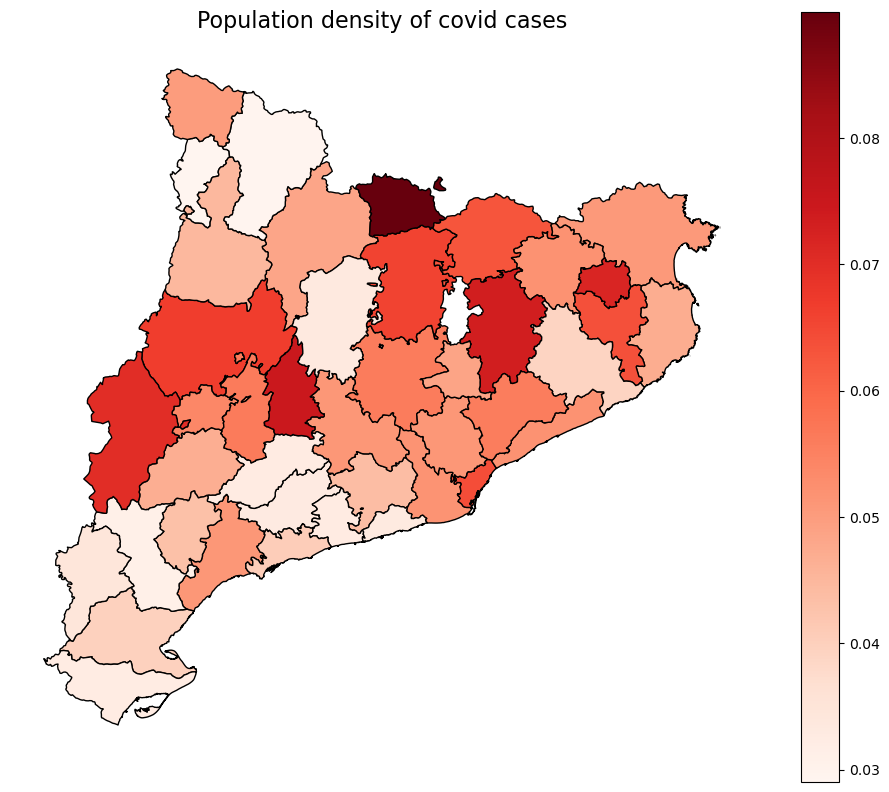

In [20]:
ax=densitat20.plot(
 column="density",
 cmap="Reds",
 legend=True,
 edgecolor="black",
 figsize=(12,10),
 #norm= LogNorm(vmin=densitat["density"].min(),
  #               vmax=densitat["density"].max())
)

ax.set_title("Population density of covid cases", fontsize=16)
ax.set_axis_off()
plt.show()

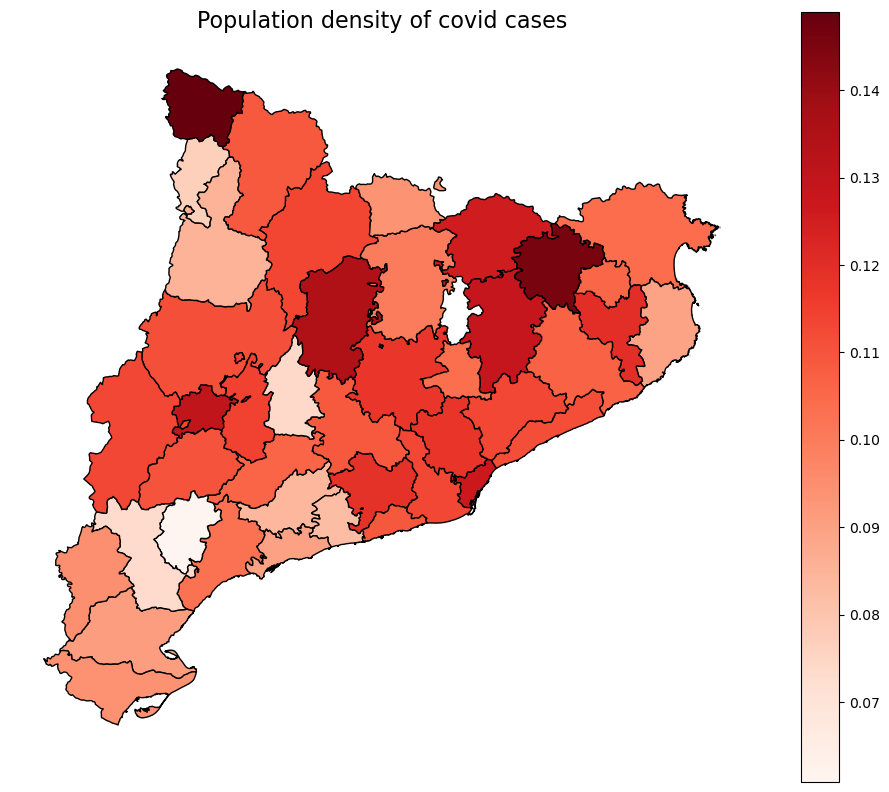

In [21]:
ax=densitat21.plot(
 column="density",
 cmap="Reds",
 legend=True,
 edgecolor="black",
 figsize=(12,10),
 #norm= LogNorm(vmin=densitat["density"].min(),
  #               vmax=densitat["density"].max())
)

ax.set_title("Population density of covid cases", fontsize=16)
ax.set_axis_off()
plt.show()

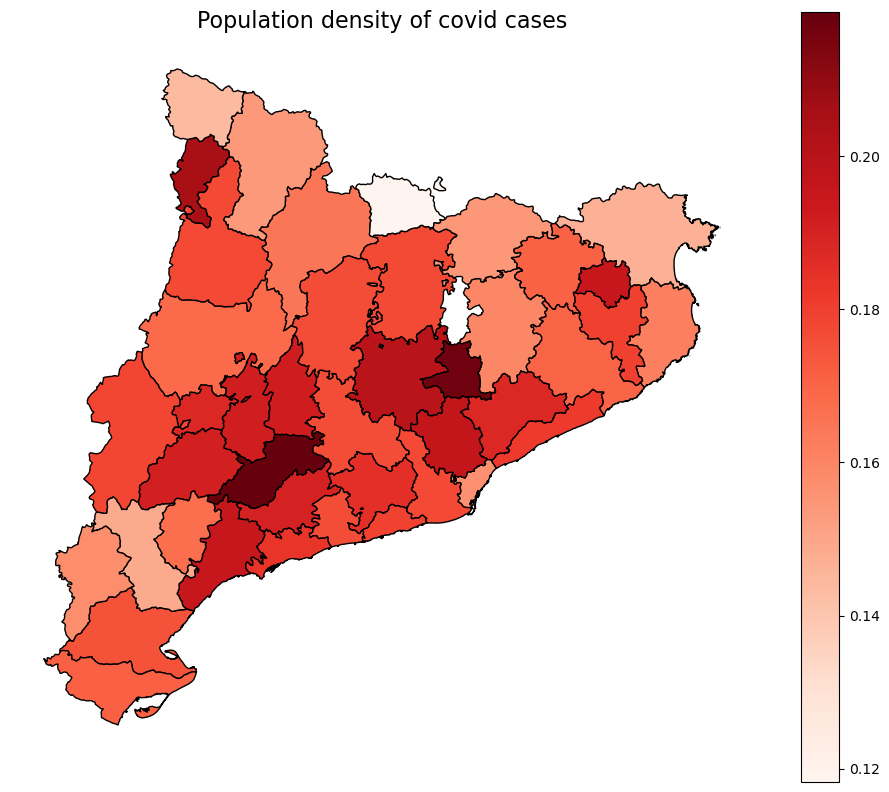

In [22]:
ax=densitat22.plot(
 column="density",
 cmap="Reds",
 legend=True,
 edgecolor="black",
 figsize=(12,10),
 #norm= LogNorm(vmin=densitat["density"].min(),
  #               vmax=densitat["density"].max())
)

ax.set_title("Population density of covid cases", fontsize=16)
ax.set_axis_off()
plt.show()

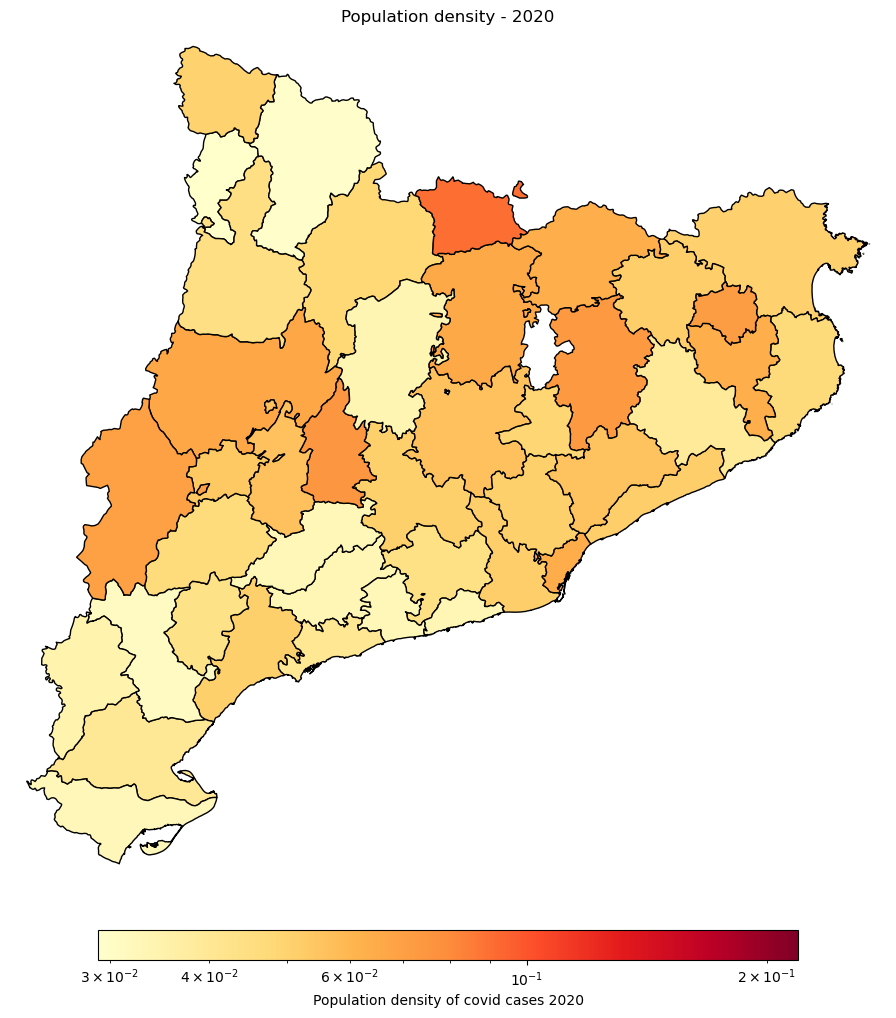

In [23]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.colors import LogNorm, Normalize
import matplotlib.cm as cm
import pandas as pd

# ensure densitat20/21/22 exist
for name in ('densitat20','densitat21','densitat22'):
    if name not in globals():
        raise NameError(f"{name} not found - run the cells that produce densitat20/21/densitat22 first")

# compute global vmin/vmax across the three years (skip NaN)
vals = []
for d in (densitat20, densitat21, densitat22):
    if 'density' in d.columns:
        vals.append(d['density'].dropna())
all_vals = pd.concat(vals) if vals else pd.Series([])
vmin = all_vals.min() if not all_vals.empty else 1e-6
vmax = all_vals.max() if not all_vals.empty else 1.0

# choose normalization (use LogNorm if positive)
if vmin > 0:
    norm = LogNorm(vmin=vmin, vmax=vmax)
else:
    norm = Normalize(vmin=vmin, vmax=vmax)

cmap = plt.get_cmap('YlOrRd')
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array(all_vals if not all_vals.empty else [vmin, vmax])

# determine fixed map extent from base covidmap geometry
minx, miny, maxx, maxy = covidmap.total_bounds
pad_frac = 0.02
dx = (maxx - minx) * pad_frac
dy = (maxy - miny) * pad_frac
xlim = (minx - dx, maxx + dx)
ylim = (miny - dy, maxy + dy)

# create figure, fixed main axis and fixed colorbar axis
fig, ax = plt.subplots(figsize=(10, 10))
fig.subplots_adjust(bottom=0.12)                     # space for colorbar
main_ax_pos = [0.05, 0.12, 0.9, 0.85]
ax.set_position(main_ax_pos)

cax = fig.add_axes([0.15, 0.04, 0.7, 0.03])         # fixed pos for horizontal colorbar
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label('Population density of covid cases')

# mapping of frames to GeoDataFrames and titles
frames = [(2020, densitat20, "Population density - 2020"),
          (2021, densitat21, "Population density - 2021"),
          (2022, densitat22, "Population density - 2022")]

def actualizar(i):
    year, gdf, title = frames[i]
    ax.clear()
    if 'density' not in gdf.columns:
        ax.text(0.5, 0.5, f"No 'density' column for {year}", ha='center', va='center')
        ax.set_axis_off()
        return

    # plot without geopandas' automatic legend (we use fixed colorbar)
    gdf.plot(column='density', ax=ax, cmap=cmap, norm=norm, legend=False, edgecolor='black')
    ax.set_title(title)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect('equal', adjustable='box')
    ax.set_axis_off()
    # colorbar already fixed; update label if desired
    cbar.set_label(f'Population density of covid cases {year}')

# create and keep a reference to the animation
ani = FuncAnimation(fig, actualizar, frames=len(frames), interval=1000, repeat=False)

# render inline in the notebook
HTML(ani.to_jshtml())